In [1]:
import numpy as np
import pandas as pd

In [2]:
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Create a list with the filepaths for training and testing
dir_ = Path('E:/ImageData/training')
train_filepaths = list(dir_.glob(r'**/*.jpg'))

dir_ = Path('E:/ImageData/testing')
test_filepaths = list(dir_.glob(r'**/*.jpg'))

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


training_set=train_datagen.flow_from_directory(
    directory=r"E:/ImageData/training",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=10,
    class_mode="binary",
    shuffle=True,
    seed=0)


test_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.1)
test_set1 = test_datagen.flow_from_directory('E:/ImageData/testing',
                                            target_size=(224,224),
                                            batch_size=10,
                                            class_mode='binary',
                                            subset='validation', 
                                            seed=0,
                                            shuffle=False)

Found 80 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [6]:
input_shape=training_set.image_shape
input_shape

(224, 224, 3)

In [7]:
## Model 
from tensorflow.keras import layers,Sequential
import tensorflow as tf

In [8]:
## Mobile net model 
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')
base_model.trainable = False
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1, activation='sigmoid')])

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
model.fit_generator(training_set,epochs =20,validation_data=test_set1,verbose=2)

c:\users\user\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
8/8 - 8s - loss: 0.5094 - accuracy: 0.8625 - val_loss: 0.0707 - val_accuracy: 1.0000
Epoch 2/20
8/8 - 3s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/20
8/8 - 3s - loss: 0.0165 - accuracy: 0.9875 - val_loss: 0.1278 - val_accuracy: 1.0000
Epoch 4/20
8/8 - 3s - loss: 0.1928 - accuracy: 0.9875 - val_loss: 0.5509 - val_accuracy: 0.7500
Epoch 5/20
8/8 - 3s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 5.4043e-04 - val_accuracy: 1.0000
Epoch 6/20
8/8 - 3s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 2.3708e-04 - val_accuracy: 1.0000
Epoch 7/20
8/8 - 3s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0900 - val_accuracy: 1.0000
Epoch 8/20
8/8 - 3s - loss: 2.3745e-05 - accuracy: 1.0000 - val_loss: 0.6847 - val_accuracy: 0.7500
Epoch 9/20
8/8 - 3s - loss: 0.0089 - accuracy: 0.9875 - val_loss: 0.1554 - val_accuracy: 1.0000
Epoch 10/20
8/8 - 3s - loss: 1.1573e-04 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 11/20
8/8 - 3s - 

In [10]:
loss,accuracy=model.evaluate(test_set1)

1/1 [==============================] - 0s 133ms/step - loss: 0.0041 - accuracy: 1.0000


In [11]:
accuracy

1.0

In [12]:
model.save('E:/Models/dogcatModel/dogcat_model_bak.h5')

In [14]:
from tensorflow.keras.models import load_model
modelx = load_model('E:/Models/dogcatModel/dogcat_model_bak.h5')

In [15]:
import json
from PIL import Image
import numpy as np

filename = "E:\Datasets\opencvImage\cat.jpg"
image = Image.open(filename)
json_data = json.dumps(np.array(image).tolist())


In [49]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
new_image = Image.fromarray(np.array(json.loads(json_data), dtype='uint8'))
imgv=tf.keras.preprocessing.image.img_to_array(new_image, data_format=None, dtype=None)

In [54]:
imn=tf.image.resize(imgv,(224, 224))

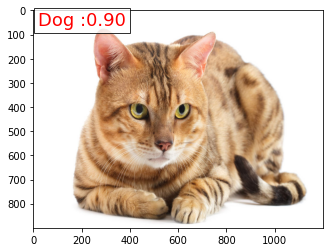

In [56]:
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(imn, axis=0)
prediction = modelx.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(new_image)
plt.show()